In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import stat
import matplotlib.pyplot as plt

In [2]:
bmd = pd.read_csv('building_metadata.csv')

In [3]:
#Investigating building use
bmd['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [4]:
#There is a healthcare category -> making new DF for it

In [5]:
hlth = bmd[bmd['primary_use']=='Healthcare']

In [6]:
hlth.sort_values('square_feet', ascending=False)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
365,3,365,Healthcare,819577,1922.0,NaN
556,3,556,Healthcare,450000,2012.0,NaN
1072,13,1072,Healthcare,305000,NaN,NaN
1243,14,1243,Healthcare,237704,NaN,NaN
1286,14,1286,Healthcare,205472,NaN,NaN
1303,14,1303,Healthcare,200000,NaN,NaN
1241,14,1241,Healthcare,194188,NaN,NaN
1285,14,1285,Healthcare,130067,NaN,NaN
1208,13,1208,Healthcare,121585,NaN,NaN
1209,13,1209,Healthcare,115788,NaN,NaN


In [7]:
#Biggest is building 365, built in 1922, followed by 556

In [21]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [98]:
full_df = pd.read_csv('train.csv',index_col='timestamp',parse_dates=True, infer_datetime_format=True)

In [99]:
full_df = full_df = reduce_mem_usage(full_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)


In [100]:
full_df.head()

,building_id,meter,meter_reading
timestamp,,,
2016-01-01,0,0,0.0
2016-01-01,1,0,0.0
2016-01-01,2,0,0.0
2016-01-01,3,0,0.0
2016-01-01,4,0,0.0


In [101]:
#full_df.index = pd.to_datetime(full_df['timestamp'],infer_datetime_format=True).asfreq(freq='H')

In [102]:
full_df.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               ...
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=20216100, freq=None)

In [103]:
#Making DF of 556 (2nd largest)
health_df_556 = full_df[full_df['building_id']==556].drop(['meter','building_id'], axis =1)

In [104]:
health_df_556

,meter_reading
timestamp,
2016-01-01 00:00:00,1013.780029
2016-01-01 01:00:00,988.380005
2016-01-01 02:00:00,996.250000
2016-01-01 03:00:00,966.219971
2016-01-01 04:00:00,984.390015
...,...
2016-12-31 19:00:00,1225.359985
2016-12-31 20:00:00,1178.640015
2016-12-31 21:00:00,1187.449951


In [105]:
health_df_556[health_df_556.isnull().any(axis=1)]

,meter_reading
timestamp,


In [106]:
health_df_556 = health_df_556.resample('H').backfill()

In [107]:
health_df_556 

,meter_reading
timestamp,
2016-01-01 00:00:00,1013.780029
2016-01-01 01:00:00,988.380005
2016-01-01 02:00:00,996.250000
2016-01-01 03:00:00,966.219971
2016-01-01 04:00:00,984.390015
...,...
2016-12-31 19:00:00,1225.359985
2016-12-31 20:00:00,1178.640015
2016-12-31 21:00:00,1187.449951


In [108]:
health_df_556[health_df_556.isnull().any(axis=1)]

,meter_reading
timestamp,


In [109]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 24
alpha = 2/(span+1)

#health_df_556['EWMA12'] = health_df_556['meter_reading'].ewm(alpha=alpha,adjust=False).mean()
health_df_556['SES24']=SimpleExpSmoothing(health_df_556['meter_reading']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)


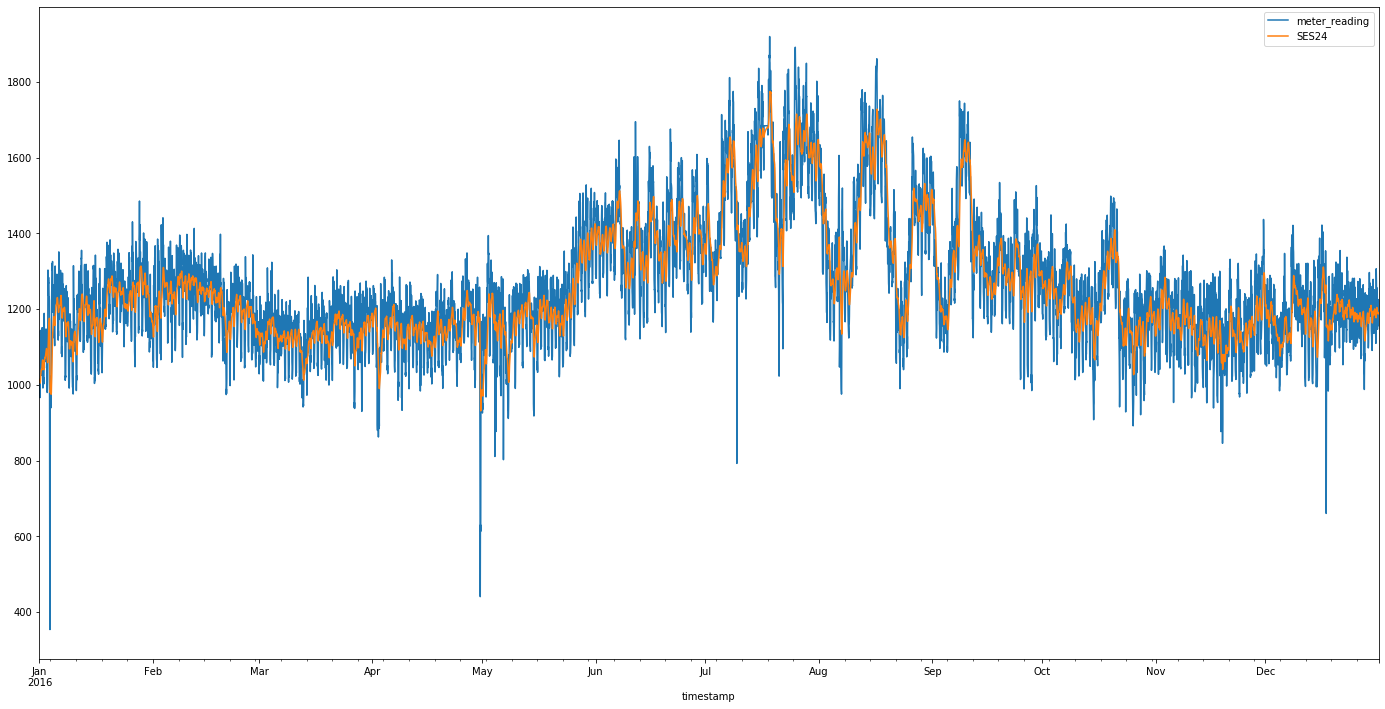

In [110]:
health_df_556.plot(figsize=(24,12))

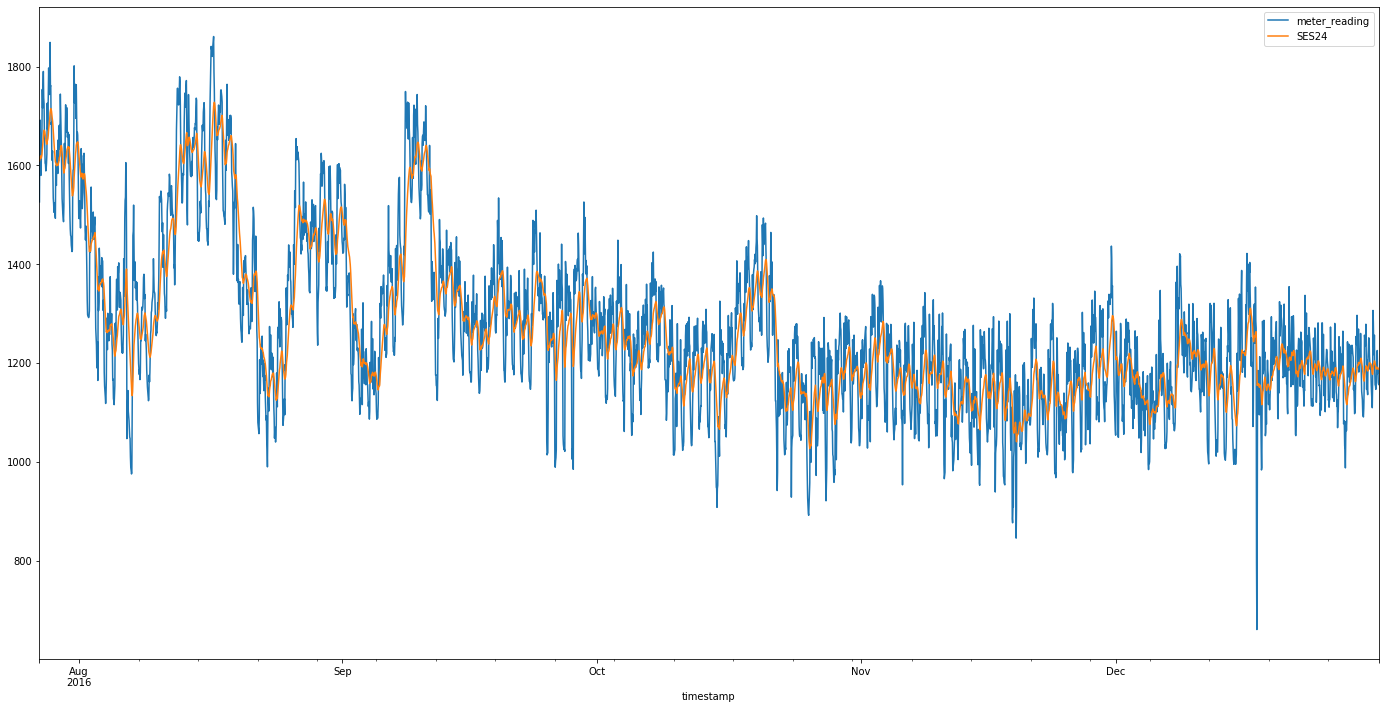

In [111]:
health_df_556.iloc[5000:].plot(figsize=(24,12))

In [112]:
#Double smoothing and tripple smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

health_df_556['DESadd24'] = ExponentialSmoothing(health_df_556['meter_reading'], trend='add').fit().fittedvalues.shift(-1)
health_df_556['TESadd24'] = ExponentialSmoothing(health_df_556['meter_reading'], trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues

In [113]:
health_df_556

,meter_reading,SES24,DESadd24,TESadd24
timestamp,,,,
2016-01-01 00:00:00,1013.780029,1013.780029,1013.797237,992.427966
2016-01-01 01:00:00,988.380005,1011.748023,988.397213,997.149915
2016-01-01 02:00:00,996.250000,1010.508178,996.267208,1012.579935
2016-01-01 03:00:00,966.219971,1006.965116,966.237178,990.922639
2016-01-01 04:00:00,984.390015,1005.159104,984.407222,1008.481971
...,...,...,...,...
2016-12-31 19:00:00,1225.359985,1191.459284,1225.377193,1191.239011
2016-12-31 20:00:00,1178.640015,1190.433740,1178.657222,1197.055501
2016-12-31 21:00:00,1187.449951,1190.195035,1187.467159,1142.731211


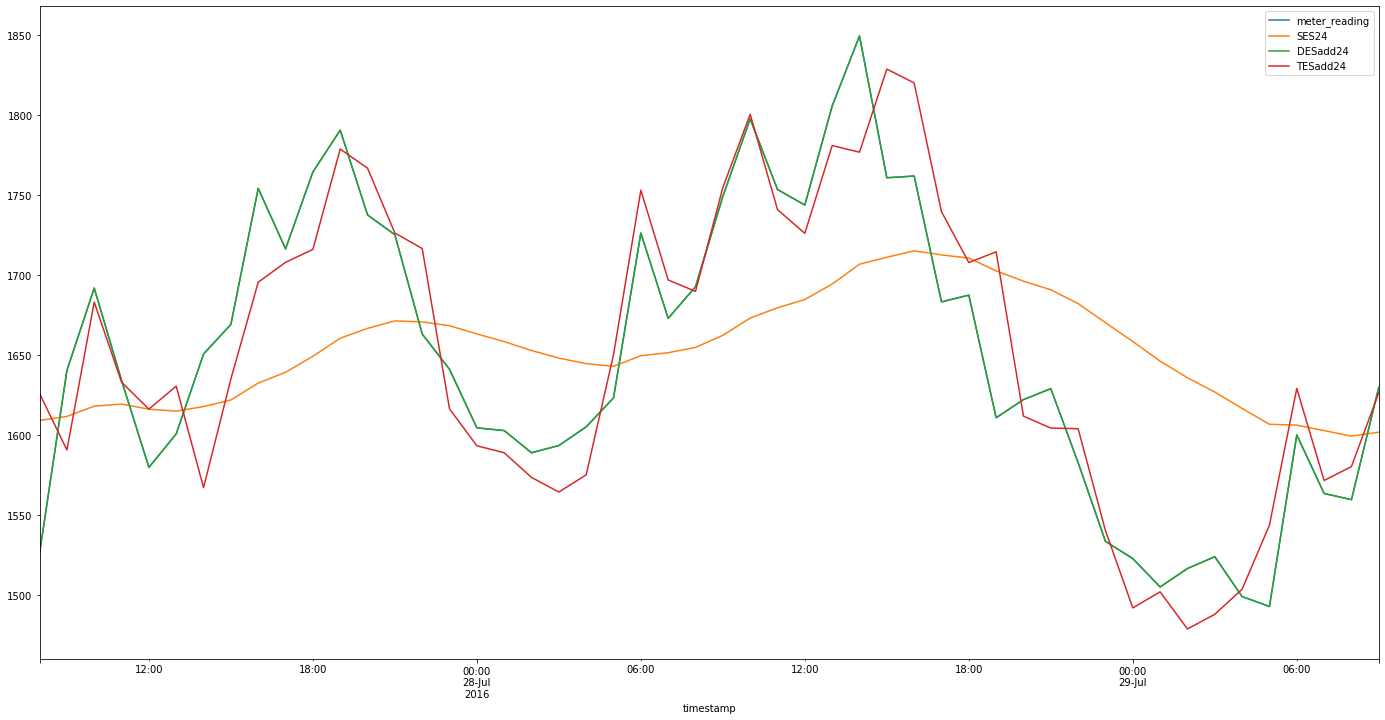

In [114]:
health_df_556.iloc[5000:5050].plot(figsize=(24,12))

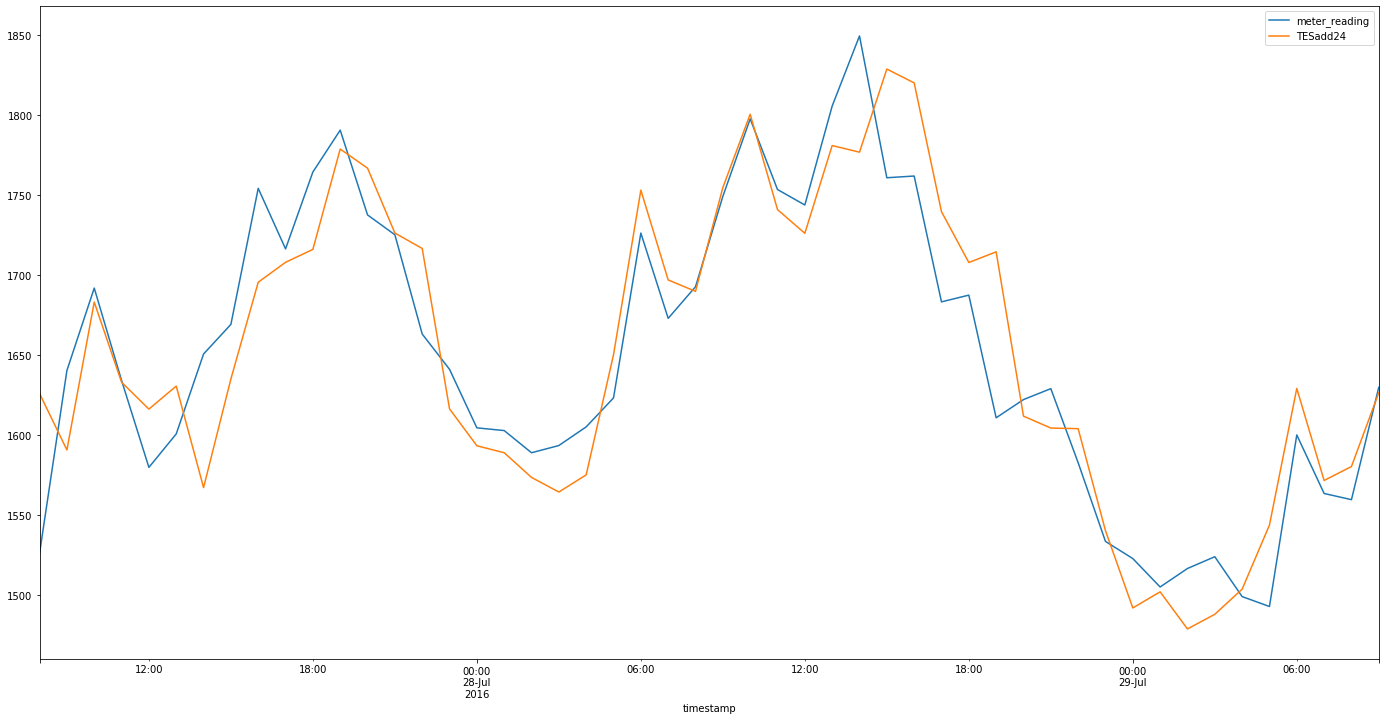

In [115]:
health_df_556[['meter_reading', 'TESadd24']].iloc[5000:5050].plot(figsize=(24,12))

In [40]:
#Double exponential smoothing gives best matching

In [41]:
#Checking for NaN and Inf

In [116]:
np.isnan(health_df_556.all()) 

meter_reading    False
SES24            False
DESadd24         False
TESadd24         False
dtype: bool

In [71]:
health_df_556.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Freq: H
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meter_reading  8784 non-null   float32
 1   SES24          8783 non-null   float64
 2   DESadd24       8783 non-null   float64
 3   TESadd24       8784 non-null   float64
dtypes: float32(1), float64(3)
memory usage: 308.8 KB


In [117]:
health_df_556.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')


,meter_reading,SES24,DESadd24,TESadd24
timestamp,,,,
2016-01-01 00:00:00,1013.780029,1013.780029,1013.797237,992.427966
2016-01-01 01:00:00,988.380005,1011.748023,988.397213,997.149915
2016-01-01 02:00:00,996.250000,1010.508178,996.267208,1012.579935
2016-01-01 03:00:00,966.219971,1006.965116,966.237178,990.922639
2016-01-01 04:00:00,984.390015,1005.159104,984.407222,1008.481971
...,...,...,...,...
2016-12-31 19:00:00,1225.359985,1191.459284,1225.377193,1191.239011
2016-12-31 20:00:00,1178.640015,1190.433740,1178.657222,1197.055501
2016-12-31 21:00:00,1187.449951,1190.195035,1187.467159,1142.731211


In [118]:
health_df_556.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8784, freq='H')

In [119]:
np.isnan(health_df_556.all()) 

meter_reading    False
SES24            False
DESadd24         False
TESadd24         False
dtype: bool

In [120]:
#health_df_556.apply(lambda s: s[np.isfinite(s)].fillna(method='ffill'))

In [78]:
#np.isfinite(health_df_556.all()) 

In [121]:
np.isinf(health_df_556.all()) 

meter_reading    False
SES24            False
DESadd24         False
TESadd24         False
dtype: bool

In [122]:
train_data = health_df_556.iloc[:7001] # Goes up to but not including 109
test_data = health_df_556.iloc[7000:]

In [123]:
train_data

,meter_reading,SES24,DESadd24,TESadd24
timestamp,,,,
2016-01-01 00:00:00,1013.780029,1013.780029,1013.797237,992.427966
2016-01-01 01:00:00,988.380005,1011.748023,988.397213,997.149915
2016-01-01 02:00:00,996.250000,1010.508178,996.267208,1012.579935
2016-01-01 03:00:00,966.219971,1006.965116,966.237178,990.922639
2016-01-01 04:00:00,984.390015,1005.159104,984.407222,1008.481971
...,...,...,...,...
2016-10-18 12:00:00,1371.939941,1295.941147,1371.957149,1320.087154
2016-10-18 13:00:00,1435.260010,1307.086656,1435.277217,1394.138095
2016-10-18 14:00:00,1378.880005,1312.830118,1378.897213,1377.549341


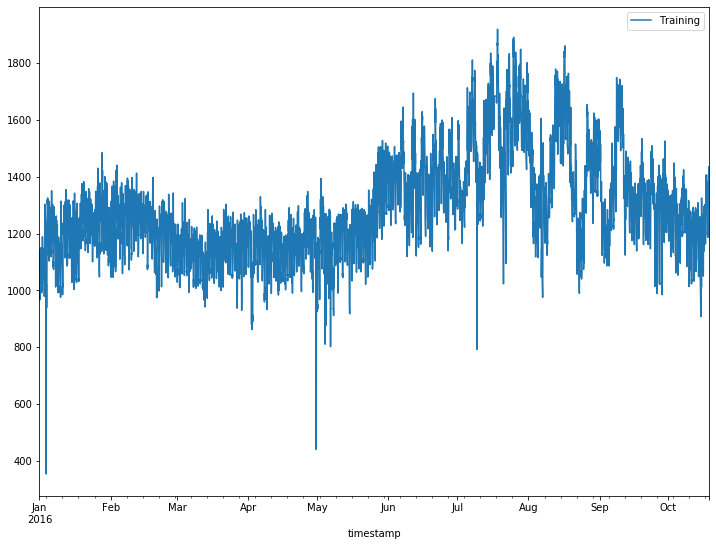

In [124]:
train_data['meter_reading'].plot(legend = True, label = 'Training', figsize=(12,9))


In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['meter_reading'],
                                    seasonal='mul',
                                    seasonal_periods=24).fit()

In [126]:
'''fitted_model = ExponentialSmoothing(train_data['meter_reading'],
                                    seasonal='mul',
                                    seasonal_periods=24).fit()'''

"fitted_model = ExponentialSmoothing(train_data['meter_reading'],\n                                    seasonal='mul',\n                                    seasonal_periods=24).fit()"

In [127]:
#ExponentialSmoothing(health_df_556['meter_reading'], trend='add').fit().fittedvalues.shift(-1)

In [128]:
type(fitted_model)

statsmodels.tsa.holtwinters.HoltWintersResultsWrapper

In [129]:
test_predictions = fitted_model.forecast(1784).rename('HW Forecast')

In [130]:
test_predictions 

2016-10-18 17:00:00    1386.585440
2016-10-18 18:00:00    1391.946130
2016-10-18 19:00:00    1415.676708
2016-10-18 20:00:00    1367.669099
2016-10-18 21:00:00    1350.132980
                          ...     
2016-12-31 20:00:00    1367.669099
2016-12-31 21:00:00    1350.132980
2016-12-31 22:00:00    1296.809348
2016-12-31 23:00:00    1257.264002
2017-01-01 00:00:00    1234.810223
Freq: H, Name: HW Forecast, Length: 1784, dtype: float64

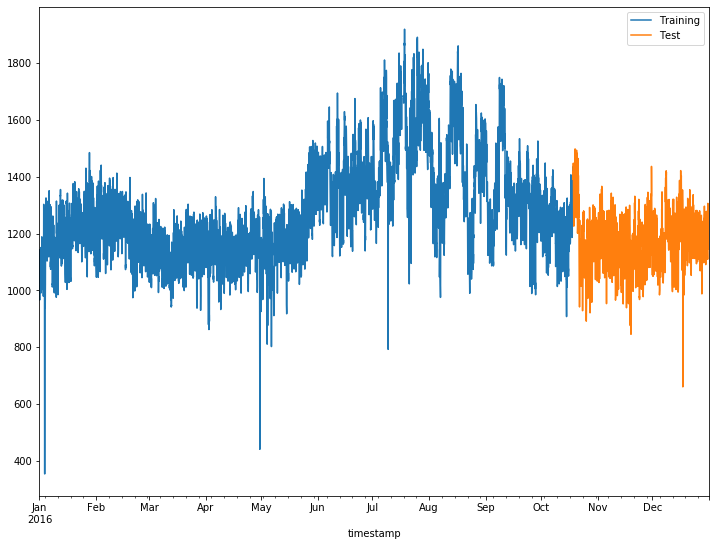

In [131]:
train_data['meter_reading'].plot(legend = True, label = 'Training', figsize=(12,9))
test_data['meter_reading'].plot(legend = True, label = 'Test', figsize=(12,9))

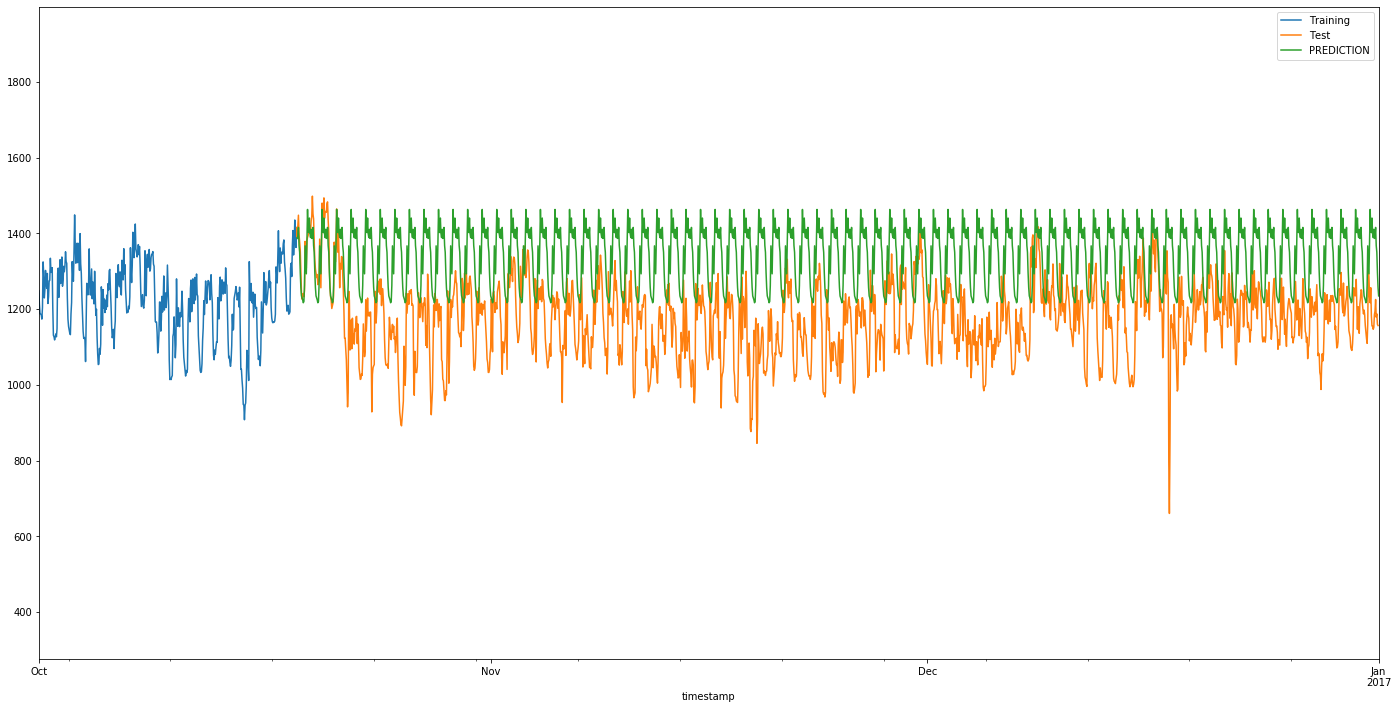

In [132]:
#Initial predictions of train/test split 
train_data['meter_reading'].plot(legend = True, label = 'Training', figsize=(24,12))
test_data['meter_reading'].plot(legend = True, label = 'Test', figsize=(24,12))
test_predictions.plot(legend=True,label='PREDICTION', xlim=['2016-10-01','2017-01-01 00:00:00 ']);

In [133]:
#Lets get some metrics goin
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [134]:
mean_absolute_error(test_data,test_predictions)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [97]:
health_df_556.describe()

,meter_reading,SES24,DESadd24,TESadd24
count,8784.000000,8783.000000,8783.000000,8784.000000
mean,1258.130249,1257.915939,1258.160984,1259.003599
std,171.736023,148.589990,171.742506,170.785234
min,353.859985,931.182842,353.877193,354.426394
25%,1145.457458,1155.162649,1145.472164,1146.097106
50%,1228.089966,1209.923137,1228.107173,1226.248803
75%,1339.517487,1328.562402,1339.562191,1338.767187
max,1919.719971,1774.674859,1919.737178,1893.201947


In [ ]:
#We are off around 200kWh per hour on average of the mean of 1260 -> around 15% off
#Not amazing but not horrific
np.sqrt(mean_squared_error(test_data,test_predictions))

In [ ]:
#Autocorrelation plot
from pandas.plotting import lag_plot

lag_plot(health_df_556['meter_reading']);

In [ ]:
#Shows considerable auto-correlation

In [ ]:
#Looking specifically at PACF/ACF
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))

lags = 200
plot_acf(health_df_556,ax=ax,lags = lags, title = 'Autocorrelation: Hospital kWh');


